In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ratings = pd.read_csv('./combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [7]:
ratings.head(30)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
6,893988,3.0
7,124105,4.0
8,1248029,3.0
9,1842128,4.0


In [8]:
ratings.tail(30)

,Cust_Id,Rating
24058233,1836014,3.0
24058234,1960927,1.0
24058235,2385226,1.0
24058236,1997469,2.0
24058237,811530,4.0
24058238,1083336,5.0
24058239,1309223,1.0
24058240,604335,4.0
24058241,307404,2.0
24058242,1334851,3.0


## EDA

In [9]:
ratings.shape

(24058263, 2)

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [11]:
ratings.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [12]:
ratings.duplicated().sum()

22234208

In [13]:
ratings.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [14]:
ratings.shape

(24058263, 2)

In [15]:
ratings.nunique()

Cust_Id    475257
Rating          5
dtype: int64

In [16]:
movie_count = ratings.isnull().sum()[1]
movie_count

4499

In [17]:
cust_count = ratings['Cust_Id'].nunique()-movie_count
cust_count

470758

In [18]:
ratings_count = ratings['Cust_Id'].count() - movie_count
ratings_count

24053764

In [19]:
rating = ratings.groupby(['Rating'])['Rating'].agg(['count'])
rating.reset_index(inplace=True)
rating

,Rating,count
0,1.0,1118186
1,2.0,2439073
2,3.0,6904181
3,4.0,8085741
4,5.0,5506583


In [20]:
movie_title = pd.read_csv('movie_titles (1).csv', encoding = "ISO-8859-1", header = None,on_bad_lines='skip')

In [21]:
movie_title.head(10)

,0,1,2
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


In [22]:
movie_title.columns = ['Id','year','movie_name']

In [23]:
movie_title.head()

,Id,year,movie_name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [24]:
movie_title.shape

(17434, 3)

In [25]:
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          17434 non-null  int64  
 1   year        17427 non-null  float64
 2   movie_name  17434 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 408.7+ KB


In [26]:
movie_title.isnull().sum()

Id            0
year          7
movie_name    0
dtype: int64

In [27]:
movie_title.duplicated().sum()

0

In [28]:
movie_title['movie_name'].unique().shape[0]

17026

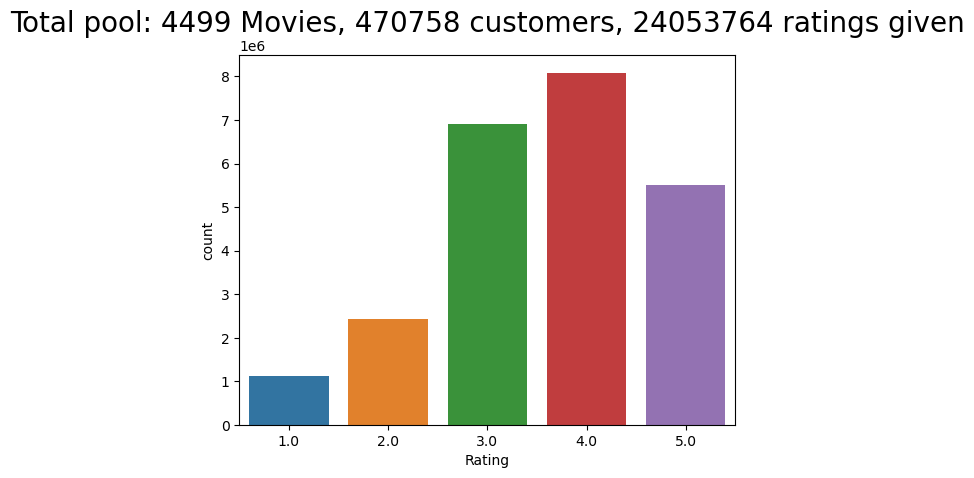

In [29]:
sns.barplot(rating,x=rating['Rating'],y=rating['count'])
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {ratings_count} ratings given', fontsize=20)
plt.show()

In [30]:
ratings_nan = pd.DataFrame(pd.isnull(ratings.Rating))

In [31]:
ratings_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [32]:
ratings_nan = ratings_nan[ratings_nan['Rating'] == True]
ratings_nan.shape

(4499, 1)

In [33]:
ratings_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [34]:
ratings_nan = ratings_nan.reset_index()
ratings_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [35]:
movie_np = []
movie_id = 1

for i,j in zip(ratings_nan['index'][1:],ratings_nan['index'][:-1]):
    
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(ratings) - ratings_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [36]:
ratings = ratings[pd.notnull(ratings['Rating'])]
ratings['Movie_Id'] = movie_np.astype(int)
ratings['Cust_Id'] =ratings['Cust_Id'].astype(int)
ratings.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [37]:
f = ['count','mean']
f

['count', 'mean']

In [38]:
ratings_movie_summary = ratings.groupby('Movie_Id')['Rating'].agg(f)
ratings_movie_summary.index = ratings_movie_summary.index.map(int)
movie_benchmark = round(ratings_movie_summary['count'].quantile(0.7),0)
drop_movie_list = ratings_movie_summary[ratings_movie_summary['count'] < movie_benchmark].index
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [39]:
ratings_cust_summary = ratings.groupby('Cust_Id')['Rating'].agg(f) 
ratings_cust_summary.index = ratings_cust_summary.index.map(int)
cust_benchmark = round(ratings_cust_summary['count'].quantile(0.7),0)
drop_cust_list = ratings_cust_summary[ratings_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [40]:
ratings.shape

(24053764, 3)

In [41]:
ratings = ratings[~ratings['Movie_Id'].isin(drop_movie_list)]
dataset = ratings[~ratings['Cust_Id'].isin(drop_cust_list)]

print('After Trim Shape: {}'.format(ratings.shape))

After Trim Shape: (22629885, 3)


In [42]:
ratings.head()

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [43]:
! pip install surprise

In [44]:
import math

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [45]:
reader = Reader()

data = Dataset.load_from_df(ratings[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0323  1.0360  1.0375  1.0352  0.0022  
MAE (testset)     0.8188  0.8263  0.8267  0.8239  0.0036  
Fit time          1.41    1.08    1.08    1.19    0.15    
Test time         0.88    0.36    0.37    0.53    0.24    


{'test_rmse': array([1.03228337, 1.03596771, 1.03746902]),
 'test_mae': array([0.81884325, 0.82629547, 0.82670751]),
 'fit_time': (1.4070284366607666, 1.084017276763916, 1.07844877243042),
 'test_time': (0.8766679763793945, 0.35947322845458984, 0.3668055534362793)}

In [46]:
ratings.head()

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [47]:
customer = ratings['Cust_Id'].unique()

In [48]:
print(customer)

[1025579  712664 1331154 ... 1103924  715803 1017887]


In [49]:
#To find top 20 movies for 100 customers
for cust in customer[0:100]:
  cust_ratings = ratings[(ratings['Cust_Id'] == cust) & (ratings['Rating'] >=4)]
  cust_ratings = cust_ratings.set_index('Movie_Id')
  cust_ratings = cust_ratings.join(movie_title)['movie_name']
  print(f'Top 20 movies of customer {cust}')
  print(cust_ratings.head(20))

Top 20 movies of customer 1025579
Movie_Id
3                            Paula Abdul's Get Up & Dance
571                                            The Terror
677               The History Channel Presents: The Alamo
788                         We Know Where You Live. Live!
798                                     The Lawnmower Man
1770    Race to Freedom: The Story of the Underground ...
2699                                  Short #5: Diversity
2862                                   The Last Seduction
3120                            Bloodfist 5: Human Target
3730                                      Rooster Cogburn
3860                                  Cosmic Voyage: IMAX
Name: movie_name, dtype: object
Top 20 movies of customer 712664
Movie_Id
3                   Paula Abdul's Get Up & Dance
18                         By Dawn's Early Light
79                              Antarctica: IMAX
118                                  Plain Dirty
143                   Get Out Your Handkerchiefs


Top 20 movies of customer 2031561
Movie_Id
3         Paula Abdul's Get Up & Dance
175                           Pressure
197                    The Deer Hunter
199                         Home Movie
253     The Hunchback of Notre Dame II
431            Beyblade: Fierce Battle
443      Jimmy Buffett: MiniMatinee #1
457         The Twilight Zone: Vol. 12
528                          The Alamo
571                         The Terror
732                            Hot War
733              Fantasy Mission Force
789                              Spies
798                  The Lawnmower Man
818                Tupac: Resurrection
840                            Bruiser
872     Monster-in-Law: Bonus Material
963                     Dil Chahta Hai
990                             Judaai
1098     MVP 2:  Most Vertical Primate
Name: movie_name, dtype: object
Top 20 movies of customer 616720
Movie_Id
3                        Paula Abdul's Get Up & Dance
52                                     The Bonese

Top 20 movies of customer 1694958
Movie_Id
175                                      Pressure
180                                    Moby: Play
187                       Airplane II: The Sequel
191      Marilyn Manson: Fear of a Satanic Planet
199                                    Home Movie
201     Sports Illustrated Swimsuit Edition: 1997
312                 Combat! Season 3: Operation 2
405                                      Vendetta
468                                   Surf Ninjas
482                            Return to Paradise
554                                  High and Low
571                                    The Terror
798                             The Lawnmower Man
886                                   Fascination
963                                Dil Chahta Hai
1020                                  Baby Mozart
1180                                  Iron & Silk
1202                            The Horror Within
1255                    Campion: Look to the Lady
1324   

Top 20 movies of customer 574843
Movie_Id
3                     Paula Abdul's Get Up & Dance
18                           By Dawn's Early Light
52                                  The Bonesetter
57                                     Dragonheart
79                                Antarctica: IMAX
108                                        Scandal
143                     Get Out Your Handkerchiefs
165                                     The Chorus
173                                 Reservoir Dogs
175                                       Pressure
248                            Cast a Giant Shadow
256                                           Mann
311    Saturday Night Live: The Best of Jon Lovitz
348                                    Pick a Card
395      Halloween 5: The Revenge of Michael Myers
413                  George Lopez: Why You Crying?
416                     The Unsinkable Molly Brown
424                                        Chobits
442               Oswald: Welcome to the

Top 20 movies of customer 1983667
Movie_Id
1370                          Kaleido Star
1590    Nausicaa of the Valley of the Wind
1595                      Pokemon Advanced
2152               The World of Suzie Wong
2448           Quincy Jones: In the Pocket
4159                             Maitresse
4472                      Circle of Deceit
Name: movie_name, dtype: object
Top 20 movies of customer 2267507
Movie_Id
3                 Paula Abdul's Get Up & Dance
18                       By Dawn's Early Light
57                                 Dragonheart
83                                  Elfen Lied
156                            A Killer Within
199                                 Home Movie
269                         Female Yakuza Tale
312              Combat! Season 3: Operation 2
348                                Pick a Card
432                            Bean: The Movie
443              Jimmy Buffett: MiniMatinee #1
459                                Coolie No.1
471              

Top 20 movies of customer 166100
Movie_Id
3            Paula Abdul's Get Up & Dance
431               Beyblade: Fierce Battle
473                              Flypaper
571                            The Terror
586                   By Hook or By Crook
895                           Buck Rogers
1176                 Teaching Mrs. Tingle
1974              The Talented Mr. Ripley
2016                            Tightrope
2452                          Exit Wounds
2578                        Runaway Train
2743                               Aandhi
3256        Ozzy Osbourne: Don't Blame Me
3371           The House of Seven Corpses
3439                             Demons 2
3446    GTO: Great Teacher Onizuka: Set 1
3730                      Rooster Cogburn
3879            Orwell Rolls in His Grave
Name: movie_name, dtype: object
Top 20 movies of customer 2537764
Movie_Id
3                           Paula Abdul's Get Up & Dance
18                                 By Dawn's Early Light
30           

Top 20 movies of customer 2312349
Movie_Id
3                       Paula Abdul's Get Up & Dance
18                             By Dawn's Early Light
30        Classic Albums: Meat Loaf: Bat Out of Hell
44                                   The Love Letter
97                                     A Fishy Story
166                     Smokey and the Bandit Part 3
191         Marilyn Manson: Fear of a Satanic Planet
241                                   Pressure Point
269                               Female Yakuza Tale
270                                             Taxi
290      Lennon Legend: The Very Best of John Lennon
299                                         The Isle
312                    Combat! Season 3: Operation 2
313    Futurama: Monster Robot Maniac Fun Collection
359                                 Stark Raving Mad
361                                 R.E.M.: Tourfilm
413                    George Lopez: Why You Crying?
474                       Building the Great Pyramid
482

Top 20 movies of customer 21983
Movie_Id
3                    Paula Abdul's Get Up & Dance
18                          By Dawn's Early Light
30     Classic Albums: Meat Loaf: Bat Out of Hell
138                              Lost in the Wild
143                    Get Out Your Handkerchiefs
191      Marilyn Manson: Fear of a Satanic Planet
209                                The Agronomist
241                                Pressure Point
275                   100 Days Before the Command
299                                      The Isle
348                                   Pick a Card
357     The Phantom of the Opera: Special Edition
361                              R.E.M.: Tourfilm
425                            Millennium Actress
445            Batman the Animated Series: Vol. 3
468                                   Surf Ninjas
474                    Building the Great Pyramid
482                            Return to Paradise
499           Blank Generation / Dancin' Barefoot
534      

Top 20 movies of customer 958382
Movie_Id
3                        Paula Abdul's Get Up & Dance
47                                     Justice League
52                                     The Bonesetter
57                                        Dragonheart
79                                   Antarctica: IMAX
152                                Demon Warrior Koji
171                               The Devil's Brigade
175                                          Pressure
199                                        Home Movie
240    Neon Genesis Evangelion: The End of Evangelion
241                                    Pressure Point
253                    The Hunchback of Notre Dame II
270                                              Taxi
299                                          The Isle
311       Saturday Night Live: The Best of Jon Lovitz
312                     Combat! Season 3: Operation 2
348                                       Pick a Card
358                The Flintstones in Vi

Top 20 movies of customer 1007809
Movie_Id
3                     Paula Abdul's Get Up & Dance
8                         Class of Nuke 'Em High 2
28                                         Boycott
30      Classic Albums: Meat Loaf: Bat Out of Hell
44                                 The Love Letter
48     Devo: The Complete Truth About De-evolution
52                                  The Bonesetter
175                                       Pressure
181                                IFilm: Deranged
191       Marilyn Manson: Fear of a Satanic Planet
199                                     Home Movie
241                                 Pressure Point
248                            Cast a Giant Shadow
257                                         Animal
270                                           Taxi
299                                       The Isle
311    Saturday Night Live: The Best of Jon Lovitz
329                                     They Crawl
331                                   T

Top 20 movies of customer 870391
Movie_Id
30        Classic Albums: Meat Loaf: Bat Out of Hell
108                                          Scandal
191         Marilyn Manson: Fear of a Satanic Planet
290      Lennon Legend: The Very Best of John Lennon
313    Futurama: Monster Robot Maniac Fun Collection
331                                     The Pacifier
348                                      Pick a Card
375                                        Live Wire
385                                          The Fan
424                                          Chobits
431                          Beyblade: Fierce Battle
443                    Jimmy Buffett: MiniMatinee #1
473                                         Flypaper
482                               Return to Paradise
489             Primus: Hallucino-Genetics Live 2004
534                                       King Cobra
571                                       The Terror
580                                Blue Planet: IMAX
660 

Top 20 movies of customer 1658752
Movie_Id
97                                  A Fishy Story
199                                    Home Movie
312                 Combat! Season 3: Operation 2
348                                   Pick a Card
357     The Phantom of the Opera: Special Edition
534                                    King Cobra
571                                    The Terror
660                       Real Kung Fu of Shaolin
670            Police Academy 3: Back in Training
707                                    44 Minutes
977                                       Yojimbo
989                           Ken Burns' The West
1470    Korn: Kornography: Unauthorized Biography
1553                        Twilight of the Golds
2015                    Requiem from the Darkness
2016                                    Tightrope
2577                                   Peter Gunn
2578                                Runaway Train
3054                                         Nora
3095   

In [ ]:
for cust in customer[0:20]:
  user = movie_title.copy()
  user = user[~user['Id'].isin(drop_movie_list)]
  data = Dataset.load_from_df(ratings[['Cust_Id', 'Movie_Id', 'Rating']], reader)
  trainset = data.build_full_trainset()
  svd.fit(trainset)
  user['Estimate_Score'] = user['id'].apply(lambda x: svd.predict(712664, x).est)
  user = user.drop('Id', axis = 1)
  user = user.sort_values('Estimate_Score', ascending=False)
  print(f'For customer {cust}\n\n')
  print(user.head(20))
  print('\n\n')